In [2]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [8]:
mnist.train.num_examples

55000

In [9]:
mnist.test.num_examples

10000

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
mnist.train.images.shape

(55000, 784)

In [14]:
mnist.train.images[1].shape

(784,)

In [16]:
mnist.train.images[1].reshape(28,28).shape

(28, 28)

In [17]:
single_image = mnist.train.images[1].reshape(28,28)

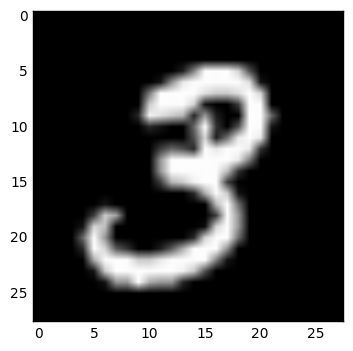

In [21]:
plt.imshow(single_image, cmap='gist_gray')

In [23]:
single_image.min()

0.0

In [24]:
single_image.max()

1.0

In [31]:
# PLACEHOLDERS
x = tf.placeholder(tf.float32, shape=[None, 784])

In [32]:
# VARIABLES
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [33]:
# CREATE GRAPH FUNCTION
y = tf.matmul(x,W) + b

In [34]:
# LOSS Function
y_true = tf.placeholder(tf.float32, [None,10])

In [35]:
cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y))

In [36]:
# OPTIMIZER
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [37]:
init = tf.global_variables_initializer()

In [38]:
with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed_dict={x:batch_x,y_true:batch_y})
    # Evaluate the model
    correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_true,1))
    
    # [True, False, True, ...] ---> [1,0,1,...]
    acc = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    print(sess.run(acc, feed_dict={x:mnist.test.images, y_true:mnist.test.labels}))

0.892
